<a href="https://colab.research.google.com/github/Eunhasuiin/Tensorflow-DeepLearning-Programing/blob/main/TDP_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Eger excution and Generate tensor

## A Tensorflow 1.X It doesn't have Eager execution

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution
import tensorflow as tf

# eger excution(즉시 실행 모드) is able?
print(tf.executing_eagerly()) #This Line return True

#turn off eger excution
disable_eager_execution() # It is originaly using tf.disable_eager_execution() but, Because of Line 1, It leads we can use like Line 6 originaly tf.compat.v1.disable_eager_execution
print(tf.executing_eagerly()) # This Line return False

False
False


###1 Graph construction

In [ ]:
import tensorflow as tf
# tf.executing_eagerly()==False

a=tf.constant(1)
b=tf.constant(2)
c=a+b # It means c=tf.add(a,b)
print(a);print(b);print(c); #Does It return 1, 2, 3

Tensor("Const_6:0", shape=(), dtype=int32)
Tensor("Const_7:0", shape=(), dtype=int32)
Tensor("add_3:0", shape=(), dtype=int32)


###2. Graph execution

In [ ]:
sess= tf.compat.v1.Session() #generating session for running tensorflow
print(sess.run(a)) # 1
print(sess.run(b)) # 2
print(sess.run(c)) # 1+2 == 3
sess.close() #removing session

1
2
3


## B Tensorflow 2.X has Eager execution

In [ ]:
from tensorflow.python.framework.ops import enable_eager_execution
import tensorflow as tf

enable_eager_execution() # tf.compat.v1.enable_eager_execution
print(tf.executing_eagerly()) # True

a=tf.constant(1)
b=tf.constant(2)

c=a+b #== c= tf.add(a,b)
print(a);print(b);print(c); # tensor object
print((int(a),b.numpy(),c.numpy())) # each value is default data_type at python

True
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
(1, 2, 3)


## C. Generating tensor

### 1 constant values

In [ ]:
import tensorflow as tf

a=tf.constant(1)
b=tf.constant([1,2,3,4])
c=tf.constant([[1,2],[3,4]])
d=tf.constant([[[1,2],[3,4]]])

print("a is %d and dtype of a is %s \n" % (a, a.dtype))

print('each depth')
print('a is %d' % a.ndim);print('b is %d' % b.ndim);print('c is %d' % c.ndim);print('d is %d' % d.ndim);
print()

print('each shape')
print('a is ',a.shape);print('b is ',b.shape);print('c is ',c.shape);print('d is ',d.shape);
print()

print("index and slicing")
print(b[0]);print(b[:2]);print(c[0,0]);print(c[:,0])

a is 1 and dtype of a is <dtype: 'int32'> 

each depth
a is 0
b is 1
c is 2
d is 3

each shape
a is  ()
b is  (4,)
c is  (2, 2)
d is  (1, 2, 2)

index and slicing
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 3], shape=(2,), dtype=int32)


### 2. variable values

In [ ]:
import tensorflow as tf

a=tf.Variable(1)
b=tf.Variable([1,2,3,4])
c=tf.Variable([[1,2],[3,4]])
d=tf.Variable([[[1,2],[3,4]]])

print("a is %d and dtype of a is %s \n" % (a, a.dtype))

#print('each depth')
#print('a is %d' % a.ndim);print('b is %d' % b.ndim);print('c is %d' % c.ndim);print('d is %d' % d.ndim);
#print()

print('each shape')
print('a is ',a.shape);print('b is ',b.shape);print('c is ',c.shape);print('d is ',d.shape);
print()

print("index and slicing")
print(b[0]);print(b[:2]);print(c[0,0]);print(c[:,0])

print(id(a))
temp=id(a)
print(a.assign(10)) # print(a.assign(10),read_value=False): No return
print(a.assign_add(20)) #30
print(a.assign_sub(10)) #20
print(id(a)-temp) #id is not chage

a is 1 and dtype of a is <dtype: 'int32'> 

each shape
a is  ()
b is  (4,)
c is  (2, 2)
d is  (1, 2, 2)

index and slicing
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 3], shape=(2,), dtype=int32)
140448137217744
<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=10>
<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=30>
<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=20>
0


### 3. a lot of function

In [ ]:
import tensorflow as tf

a=tf.zeros(shape=(2,3)) # Generate 2X3 array filled 0
print(a)
b=tf.ones(shape=(2,3)) # Generate 2X3 array filled 1
print(b)
c=tf.zeros_like(b) #Generate same size with b filled 0
print(c)
d=tf.ones_like(c) #Generate same size with c filled 1
print(d)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


In [2]:
import tensorflow as tf

a=tf.fill([2,3],2.0) # Generate 2X3 array filled 2.0
print(a)
b=tf.linspace(0.0,1.0,5) # [0.,0.25,0.5,0.75,1.0]
print(b)
c=tf.range(5) #[0,1,2,3,4]
print(c)
d=tf.range(1,5,0.5) #Generate same size with c filled 1
print(d)
w=tf.Variable(d) #changable value w
print(w)

tf.Tensor(
[[2. 2. 2.]
 [2. 2. 2.]], shape=(2, 3), dtype=float32)
tf.Tensor([0.   0.25 0.5  0.75 1.  ], shape=(5,), dtype=float32)
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int32)
tf.Tensor([1.  1.5 2.  2.5 3.  3.5 4.  4.5], shape=(8,), dtype=float32)
<tf.Variable 'Variable:0' shape=(8,) dtype=float32, numpy=array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5], dtype=float32)>


In [3]:
import tensorflow as tf

a=range(6) #Set a [1,2,3,4,5,6]
print(a)
b=tf.reshape(a, shape= (2,3)) #make a to [2,3] array It sames tf.reshape(a, shape= (-1,3))
print(b)
c= tf.reshape(b, shape=(-1,))
print(c)
d=tf.transpose(b) #set d= b inverse
print(d)

range(0, 6)
tf.Tensor(
[[0 1 2]
 [3 4 5]], shape=(2, 3), dtype=int32)
tf.Tensor([0 1 2 3 4 5], shape=(6,), dtype=int32)
tf.Tensor(
[[0 3]
 [1 4]
 [2 5]], shape=(3, 2), dtype=int32)


In [17]:
import tensorflow as tf

a=tf.constant([1,2])
b=tf.constant([3,4])

tf.stack([a,b]) #set axis=0 -> It fill row first
tf.stack([a,b], axis=1) #set axis=1 -> It fill column first

c=tf.concat([a,b], axis=0) # concat (It means link like chane) array A and array B If axis=0 -> It link row / axis=1 -> It link column 
print(c,end="\n\n")

a=tf.reshape(a, shape=(1,2))
b=tf.reshape(b, shape=(1,2))
c=tf.concat([a,b], axis=0)
print(c,end="\n\n")

print(tf.concat([a,b], axis=1),end="\n\n") # It link row [1,4]
print(tf.concat([c,b], axis=0),end="\n\n") # It link column [3,2]

b=tf.reshape(b, shape=(2,1))
print(b,end="\n\n")

print(tf.concat([c,b], axis=1))

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)

tf.Tensor([[1 2 3 4]], shape=(1, 4), dtype=int32)

tf.Tensor(
[[1 2]
 [3 4]
 [3 4]], shape=(3, 2), dtype=int32)

tf.Tensor(
[[3]
 [4]], shape=(2, 1), dtype=int32)

tf.Tensor(
[[1 2 3]
 [3 4 4]], shape=(2, 3), dtype=int32)



In [18]:
import tensorflow as tf
a=tf.constant([1,2]) #It is constant value array([1,2])
print(a, end="\n\n")

b= tf.expand_dims(a, axis=0) #It seems (1,2) and array [[1,2]]
print(b, end="\n\n")

c=tf.expand_dims(a,axis=1) #It seems (2,1) and array [[1],[2]]
print(c, end="\n\n")

d=tf.expand_dims(c, axis=0) # It seems (1,2,1) and array [[[1],[2]]]
print(d, end="\n\n")

e=tf.squeeze(d) # remove shape size = 1 at all axis -> It seems(2,) and array [1,2]
print(e, end="\n\n")

f=tf.squeeze(d, axis=2) #remove all axis size at axis 2 -> It seems(1,2) and array [[1,2]]
print(f)

tf.Tensor([1 2], shape=(2,), dtype=int32)

tf.Tensor([[1 2]], shape=(1, 2), dtype=int32)

tf.Tensor(
[[1]
 [2]], shape=(2, 1), dtype=int32)

tf.Tensor(
[[[1]
  [2]]], shape=(1, 2, 1), dtype=int32)

tf.Tensor([1 2], shape=(2,), dtype=int32)

tf.Tensor([[1 2]], shape=(1, 2), dtype=int32)


In [22]:
from tensorflow._api.v2.compat.v1 import Variable
import tensorflow as tf
tf.random.set_seed(1) #It seems like set_seed() at R

a=range(5)
print(tf.random.shuffle(a),end="\n\n") #It return return tensor A shuffle random
print(tf.random.uniform(shape=(2,3),minval=0, maxval=1),end="\n\n") #make (2,3) array filled data from uniform distribution min-max 0 to 1

print(tf.random.normal(shape=(2,3)),end="\n\n") #make (2,3) array filled Nomal distribution data set mean=0 stddev=1
print(tf.random.normal(shape=(2,3), mean=10, stddev=2),end="\n\n")
print(tf.random.truncated_normal(shape=(2,3)),end="\n\n") #generate (2,3) array filled standard normal distribution data from {x|(mean+-2*stddev>x)} of random value

w=Variable(tf.random.truncated_normal(shape=(2,3))) #set w that initialize tensor Varialbe to truncated_normal mean=0 stddev=1
print(w)

tf.Tensor([2 0 1 4 3], shape=(5,), dtype=int32)

tf.Tensor(
[[0.51010704 0.44353175 0.4085331 ]
 [0.9924923  0.68866396 0.34584963]], shape=(2, 3), dtype=float32)

tf.Tensor(
[[-0.45701224 -0.40686727  0.72857773]
 [-0.8929778   0.31261146  0.9942925 ]], shape=(2, 3), dtype=float32)

tf.Tensor(
[[13.388033  10.239387   7.6830797]
 [10.345208   8.571008  11.379201 ]], shape=(2, 3), dtype=float32)

tf.Tensor(
[[ 0.6118191   0.49197587  0.8756376 ]
 [-0.6439091   0.94869226 -0.78464967]], shape=(2, 3), dtype=float32)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[-1.1771783 , -0.90325946,  0.8419609 ],
       [-0.06870949,  0.33911815, -0.9542566 ]], dtype=float32)>


### 4 base of tensorflow calculate

In [23]:
import tensorflow as tf
a=tf.constant([1,2])

print(a+1) #== tf.add(a,1) == tf.math.add(a,1)
print(a-1) #== tf.subtract(a,1) == tf.math.subtract(a,1)
print(a*1) #== tf.multiply(a,1) == tf.math.multiply(a,1)
print(a/1) #== tf.divide(a,1) == tf.math.divide(a,1) -> dtype change float64

b=tf.constant([3,4])

print(a+b) #==tf.add(a,b)
print(a-b) #==tf.subtract(a,b)
print(a*b) #==tf.multiply(a,b)
print(a/b) #==tf.divide(a,b) -> dtype change float64

#Watch carefully how to move at multy dimention
a=tf.constant([[1,2],[3,4]])
b=tf.constant([1,2])

print(a+b) #==tf.add(a,b)
print(a-b) #==tf.subtract(a,b)
print(a*b) #==tf.multiply(a,b)
print(a/b) #==tf.divide(a,b) -> dtype change float64

tf.Tensor([2 3], shape=(2,), dtype=int32)
tf.Tensor([0 1], shape=(2,), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([1. 2.], shape=(2,), dtype=float64)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor([-2 -2], shape=(2,), dtype=int32)
tf.Tensor([3 8], shape=(2,), dtype=int32)
tf.Tensor([0.33333333 0.5       ], shape=(2,), dtype=float64)
tf.Tensor(
[[2 4]
 [4 6]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[0 0]
 [2 2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 4]
 [3 8]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1. 1.]
 [3. 2.]], shape=(2, 2), dtype=float64)


In [26]:
import tensorflow as tf
a=tf.reshape(tf.range(12),shape=(3,4))
print(a,end="\n\n")

#reduce_min
print(tf.reduce_min(a)) #get most small number at tensor a
print(tf.reduce_min(a,axis=0)) #get smallest number at tensor a`s each column
print(tf.reduce_min(a,axis=1),end="\n\n" ) #get smallest number at tensor a`s each row

#reduce_max
print(tf.reduce_max(a)) #get biggest number at tensor a
print(tf.reduce_max(a,axis=0)) #get biggest number at tensor a`s each column
print(tf.reduce_max(a,axis=1),end="\n\n") #get biggest number at tensor a`s each row

#reduce_sum
print(tf.reduce_sum(a)) #get result af sum all number at tensor a
print(tf.reduce_sum(a,axis=0)) #get result af sum all number at tensor a`s each column
print(tf.reduce_sum(a,axis=1),end="\n\n") #get result af sum all number at tensor a`s each row

#reduce_mean
print(tf.reduce_mean(a)) #get result af mean all number at tensor a
print(tf.reduce_mean(a,axis=0)) #get result af mean all number at tensor a`s each column
print(tf.reduce_mean(a,axis=1),end="\n\n") #get result af mean all number at tensor a`s each row

#reduce_prod
print(tf.reduce_prod(a)) #get result af prod all number at tensor a
print(tf.reduce_prod(a,axis=0)) #get result af prod all number at tensor a`s each column
print(tf.reduce_prod(a,axis=1),end="\n\n") #get result af prod all number at tensor a`s each row

tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]], shape=(3, 4), dtype=int32)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)
tf.Tensor([0 4 8], shape=(3,), dtype=int32)

tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int32)
tf.Tensor([ 3  7 11], shape=(3,), dtype=int32)

tf.Tensor(66, shape=(), dtype=int32)
tf.Tensor([12 15 18 21], shape=(4,), dtype=int32)
tf.Tensor([ 6 22 38], shape=(3,), dtype=int32)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int32)
tf.Tensor([1 5 9], shape=(3,), dtype=int32)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor([  0  45 120 231], shape=(4,), dtype=int32)
tf.Tensor([   0  840 7920], shape=(3,), dtype=int32)



In [33]:
a=tf.random.shuffle(tf.range(12))
print(a,end="\n\n")

print(tf.sort(a)) #durection = "ASCENDING"
print(tf.sort(a, direction="DESCENDING"),end="\n\n")

a=tf.reshape(a, shape=(3,4))
print(a,end="\n\n")

print(tf.sort(a)) #tf.sort(a,axis=1) sorting each row
print(tf.sort(a, axis=0)) # sorting each column

tf.Tensor([ 2  5  3  9 10  7 11  8  6  1  0  4], shape=(12,), dtype=int32)

tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11], shape=(12,), dtype=int32)
tf.Tensor([11 10  9  8  7  6  5  4  3  2  1  0], shape=(12,), dtype=int32)

tf.Tensor(
[[ 2  5  3  9]
 [10  7 11  8]
 [ 6  1  0  4]], shape=(3, 4), dtype=int32)

tf.Tensor(
[[ 2  3  5  9]
 [ 7  8 10 11]
 [ 0  1  4  6]], shape=(3, 4), dtype=int32)
tf.Tensor(
[[ 2  1  0  4]
 [ 6  5  3  8]
 [10  7 11  9]], shape=(3, 4), dtype=int32)


#### A. Leanear

In [38]:
import tensorflow as tf
a=tf.constant([1,2,3],dtype=tf.float64)

print(tf.norm(a),end="\n\n") # caculate norm

A=tf.constant([[1,2],[3,4]],dtype=tf.float64)
print(tf.linalg.matrix_transpose(A)) #calculate A transpose

print(tf.linalg.det(A)) #calculate determinat if det != 0 It has inverse function
B=tf.linalg.inv(A) #calculate inverse of A
print(B,end="\n\n")

print(tf.matmul(A,B)) #multiply of A and B In this case A is inverse of B so It leads unit matrix

tf.Tensor(3.7416573867739413, shape=(), dtype=float64)

tf.Tensor(
[[1. 3.]
 [2. 4.]], shape=(2, 2), dtype=float64)
tf.Tensor(-2.0000000000000004, shape=(), dtype=float64)
tf.Tensor(
[[-2.   1. ]
 [ 1.5 -0.5]], shape=(2, 2), dtype=float64)

tf.Tensor(
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]], shape=(2, 2), dtype=float64)


In [43]:
import tensorflow as tf

A=tf.constant([[1,4,1],[1,6,-1],[2,-1,2]],dtype=tf.float64)
b=tf.constant([[7],[13],[5]],dtype=tf.float64)

print(tf.linalg.det(A), end="\n\n") #-18.0
x=tf.matmul(tf.linalg.inv(A),b) # x = inv(A) X b ->>> [3,3] X [3,1] = [3,1] 

#check error
def all_close(x,y, tol=1e-5):
  return(tf.reduce_sum(tf.abs(x-y))) < tol
  return(tf.reduce_sum(tf.square(x-y))) < tol

print("matmul:",str(all_close(tf.linalg.matmul(A,x),b)), end="\n\n")

x=tf.linalg.solve(A,b)
print(x, end="\n\n")
print("solve:",str(all_close(tf.linalg.matmul(A,x),b)))

tf.Tensor(-17.999999999999996, shape=(), dtype=float64)

matmul: tf.Tensor(True, shape=(), dtype=bool)

tf.Tensor(
[[ 5.]
 [ 1.]
 [-2.]], shape=(3, 1), dtype=float64)

solve: tf.Tensor(True, shape=(), dtype=bool)


In [73]:
from tensorflow.python.ops.init_ops import deprecated_arg_values
from tensorflow._api.v2 import linalg
import tensorflow as tf

A=tf.constant([[1,4,1],[1,6,-1],[2,-1,2]],dtype=tf.float64)

L_U,p= tf.linalg.lu(A)
print(L_U)
print(p)
print();print()

#making P, L, U
U=tf.linalg.band_part(L_U, 0, -1) #Upper triangular
print(U)
L=tf.linalg.band_part(L_U,-1,0) #Lower triangular
print(L,end="\n\n")

L=tf.linalg.set_diag(L, [1,1,1]) #strictly lower triangular part of LU
print(L)

P=tf.gather(tf.eye(3),p) #tf.eye is unit matrix tf.gatheris https://www.tensorflow.org/api_docs/python/tf/gather
print(P)
print();print()

#check A == PLU under this 2 function is same tool
print(tf.linalg.lu_reconstruct(L_U,p))
P=tf.cast(P, tf.float64) #P is int32 before. So We have to cast P to float64
print(tf.matmul(P, tf.matmul(L,U))) #It is same with tf.gather(tf.matmul(L,U),p)
print();print()

#solve Ax=b using PLUx=b
print(tf.linalg.lu_solve(L_U, p, b))
y=tf.linalg.triangular_solve(L, tf.matmul(tf.transpose(P),b))
print(y)

x=tf.linalg.triangular_solve(U, y, lower=False)
print(x)
print();print()

#pivot, calculate det and rank
D=tf.linalg.diag_part(L_U) #tf.linalg.diag_part(U)
print(D)
rank=tf.math.count_nonzero(D)
print(rank,end="\n\n\n")

det_U=tf.reduce_prod(tf.linalg.diag_part(U)) #tf.linalg.det(U)
det_L=tf.reduce_prod(tf.linalg.diag_part(L)) #tf.linalg.det(L)
det_P=tf.linalg.det(P)

print(det_U);print(det_L);print(det_P)
det_A=det_P*det_L*det_U
print(det_A)

tf.Tensor(
[[ 2.         -1.          2.        ]
 [ 0.5         6.5        -2.        ]
 [ 0.5         0.69230769  1.38461538]], shape=(3, 3), dtype=float64)
tf.Tensor([2 1 0], shape=(3,), dtype=int32)


tf.Tensor(
[[ 2.         -1.          2.        ]
 [ 0.          6.5        -2.        ]
 [ 0.          0.          1.38461538]], shape=(3, 3), dtype=float64)
tf.Tensor(
[[2.         0.         0.        ]
 [0.5        6.5        0.        ]
 [0.5        0.69230769 1.38461538]], shape=(3, 3), dtype=float64)

tf.Tensor(
[[1.         0.         0.        ]
 [0.5        1.         0.        ]
 [0.5        0.69230769 1.        ]], shape=(3, 3), dtype=float64)
tf.Tensor(
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]], shape=(3, 3), dtype=float32)


tf.Tensor(
[[ 1.  4.  1.]
 [ 1.  6. -1.]
 [ 2. -1.  2.]], shape=(3, 3), dtype=float64)
tf.Tensor(
[[ 1.  4.  1.]
 [ 1.  6. -1.]
 [ 2. -1.  2.]], shape=(3, 3), dtype=float64)


tf.Tensor(
[[ 5.]
 [ 1.]
 [-2.]], shape=(3, 1), dtype=float64)
tf.Tensor(
[[ 5.

tf.Tensor(
[[5. 3.]
 [3. 3.]], shape=(2, 2), dtype=float32)


tf.Tensor(
[[-3.]
 [ 5.]], shape=(2, 1), dtype=float32)

tf.Tensor(
[[-3.]
 [ 5.]], shape=(2, 1), dtype=float32)


tf.Tensor(
[[-3.]
 [ 5.]], shape=(2, 1), dtype=float32)


tf.Tensor(
[[-2.9999995]
 [ 4.9999995]], shape=(2, 1), dtype=float32)


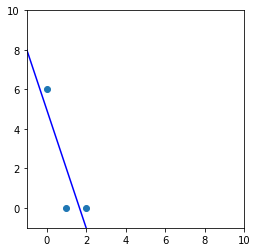

In [78]:
#Least Square solution
import tensorflow as tf

A=tf.constant([[0,1],[1,1],[2,1]],dtype=tf.float32)
b=tf.constant([[6],[0],[0]],dtype=tf.float32)

At=tf.transpose(A)
C=tf.matmul(At,A)
print(C,end="\n\n\n")

#At Ax= At b
x=tf.linalg.solve(C, tf.matmul(At,b))
print(x, end="\n\n")


x2=tf.matmul(tf.matmul(tf.linalg.inv(C),At),b)
print(x2, end="\n\n\n")

#A=PLU split
L_U, p= tf.linalg.lu(C)
x3=tf.linalg.lu_solve(L_U,p,tf.matmul(At,b))
print(x3, end="\n\n\n")

#tf.linaglstsq()
x4=tf.linalg.lstsq(A,b)
print(x4)

#draw line
m,c=x.numpy()[:,0]
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')
plt.scatter(x=A.numpy()[:,0],y=b.numpy())
t=tf.linspace(-1.0,3.0,num=51)
b1=m*t+c
plt.plot(t, b1,"b-")
plt.axis([-1,10,-1,10])
plt.show()


### B Gradient Decent method

k=336: f(2.250152587890625)=-6.542968514237657
[f(0), f(9/4), f(-2), f(4)] [2, -6.54296875, 42, 66]


<function matplotlib.pyplot.show(close=None, block=None)>

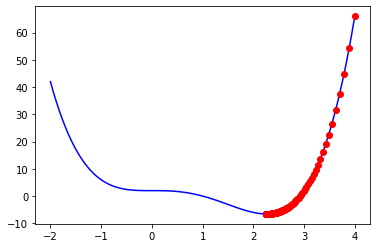

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#def function
def f(x):
  return x**4 - 3*x**3 + 2
def fprime(x):
  h=1e-3
  return (f(x+h)-f(x))/h

# hyper parameter
k=0
max_iters=1000
lr=1e-3
tol=1e-5

x_old= 0.0
x_new=4.0
x_list=[x_new]

#main
x=tf.Variable(x_new, dtype=tf.float32)

while abs(x_old - x_new) >tol and k < max_iters:
  k+=1
  x_old=x.numpy()
  step=lr*fprime(x)
  x.assign_sub(step, read_value=False) #update value by gradient decent method
  x_new=x.numpy()
  x_list.append(x_new)
print('k={}: f({})={}'.format(k,x_new,f(x_new)))

print("[f(0), f(9/4), f(-2), f(4)]",[f(0), f(9/4), f(-2), f(4)])

xs=tf.linspace(-2.0,4.0, num=101)
ys=f(xs)
plt.plot(xs,ys, 'b-')

x_list=tf.constant(x_list,dtype=tf.float32)
y_list=f(x_list)
plt.plot(x_list,y_list,'ro')
plt.show